**Feature engineering**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime



In [ ]:
pdf = pd.read_csv('price.csv')
df = pd.read_csv('clean_data_after_eda.csv')

In [ ]:
df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,01-11-2015,23-06-2015,0.00,...,0.000131,4.100000e-05,9.084740e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1.0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,21-08-2009,30-08-2016,21-08-2009,31-08-2015,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0.0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,16-04-2010,16-04-2016,16-04-2010,17-04-2015,47.96,...,0.000004,9.450000e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450000e-08,0.000000e+00,0.0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,30-03-2010,30-03-2016,30-03-2010,31-03-2015,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0.0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,13-01-2010,07-03-2016,13-01-2010,09-03-2015,445.75,...,0.000011,2.900000e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.900000e-06,4.860000e-10,0.0


taking mean of all the off_peak in 1st period

In [ ]:
monthly_price = pdf.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()


In [ ]:
monthly_price.head(5)

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0010ee3855fdea87602a5b7aba8e42de,2015-01-01,0.123086,40.565969
1,0010ee3855fdea87602a5b7aba8e42de,2015-02-01,0.123086,40.565969
2,0010ee3855fdea87602a5b7aba8e42de,2015-03-01,0.123086,40.565969
3,0010ee3855fdea87602a5b7aba8e42de,2015-04-01,0.123086,40.565969
4,0010ee3855fdea87602a5b7aba8e42de,2015-05-01,0.123086,40.565969


sorting the comapnies by month and we will take jan and dec data for our ananlysis .. this step involves sorting jan and dec data

In [ ]:
jan_prices = monthly_price.groupby('id').first().reset_index()
jan_prices.head(10)

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0010ee3855fdea87602a5b7aba8e42de,2015-01-01,0.123086,40.565969
1,00114d74e963e47177db89bc70108537,2015-01-01,0.149434,44.266931
2,001cd16732dc7d5bdf46b0d49996c271,2015-01-01,0.152445,44.266931
3,001dc71143f45cb58aaccc2e94823c5a,2015-01-01,0.148825,44.266931
4,002b3009d069858b471918402fb237b7,2015-01-01,0.106459,59.173468
5,0030bd55614c2c5e693e04b64faa6445,2015-01-01,0.168185,44.266931
6,003e7fcd19e10f5114c29ce4a6997ba0,2015-01-01,0.188164,45.760931
7,003fb333060c256bff67d8d550bff1fa,2015-01-01,0.125976,40.565969
8,0042d28bd6161dad1212cbafef43d147,2015-01-01,0.129444,40.565969
9,00459ffab7bbdf775a4f8c4c54cd0647,2015-01-01,0.124732,40.728885


In [ ]:
dec_prices = monthly_price.groupby('id').last().reset_index()
dec_prices.head(10)

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885
1,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930
2,001cd16732dc7d5bdf46b0d49996c271,2015-12-01,0.200142,46.444710
3,001dc71143f45cb58aaccc2e94823c5a,2015-12-01,0.145047,44.444710
4,002b3009d069858b471918402fb237b7,2015-12-01,0.100664,59.173468
5,0030bd55614c2c5e693e04b64faa6445,2015-12-01,0.166638,44.444710
6,003e7fcd19e10f5114c29ce4a6997ba0,2015-12-01,0.140172,44.444710
7,003fb333060c256bff67d8d550bff1fa,2015-12-01,0.118175,40.728885
8,0042d28bd6161dad1212cbafef43d147,2015-12-01,0.119916,40.728885
9,00459ffab7bbdf775a4f8c4c54cd0647,2015-12-01,0.117594,40.728885


renaming peak_off values for easy analysis and understanding

In [ ]:
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}),
                jan_prices.drop(columns='price_date'), on='id')
diff.head(10)

,id,price_date,dec_1,dec_2,price_off_peak_var,price_off_peak_fix
0,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885,0.123086,40.565969
1,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930,0.149434,44.266931
2,001cd16732dc7d5bdf46b0d49996c271,2015-12-01,0.200142,46.444710,0.152445,44.266931
3,001dc71143f45cb58aaccc2e94823c5a,2015-12-01,0.145047,44.444710,0.148825,44.266931
4,002b3009d069858b471918402fb237b7,2015-12-01,0.100664,59.173468,0.106459,59.173468
5,0030bd55614c2c5e693e04b64faa6445,2015-12-01,0.166638,44.444710,0.168185,44.266931
6,003e7fcd19e10f5114c29ce4a6997ba0,2015-12-01,0.140172,44.444710,0.188164,45.760931
7,003fb333060c256bff67d8d550bff1fa,2015-12-01,0.118175,40.728885,0.125976,40.565969
8,0042d28bd6161dad1212cbafef43d147,2015-12-01,0.119916,40.728885,0.129444,40.565969
9,00459ffab7bbdf775a4f8c4c54cd0647,2015-12-01,0.117594,40.728885,0.124732,40.728885





Calculating mean for every period instead of whole year






In [ ]:
mean_p = pdf.groupby(['id']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

In [ ]:
mean_p.head(10)

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
1,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
2,001cd16732dc7d5bdf46b0d49996c271,0.172369,0.000000,0.000000,45.189154,0.000000,0.000000
3,001dc71143f45cb58aaccc2e94823c5a,0.147308,0.000000,0.000000,44.355820,0.000000,0.000000
4,002b3009d069858b471918402fb237b7,0.104044,0.092514,0.065678,59.173468,36.490689,8.367731
5,0030bd55614c2c5e693e04b64faa6445,0.167797,0.086114,0.000000,44.355820,0.000000,0.000000
6,003e7fcd19e10f5114c29ce4a6997ba0,0.157671,0.000000,0.000000,44.883450,0.000000,0.000000
7,003fb333060c256bff67d8d550bff1fa,0.122726,0.102185,0.072778,40.633851,24.380309,16.253540
8,0042d28bd6161dad1212cbafef43d147,0.125246,0.104856,0.075744,40.661003,24.396601,16.264402
9,00459ffab7bbdf775a4f8c4c54cd0647,0.125854,0.098532,0.059633,41.318559,20.364442,13.576296


This step finds the difference betwen all the consective means for a peroid

1. difference for var price






In [ ]:
mean_p['off_peak_peak_var_mean_diff'] = mean_p['price_off_peak_var'] - mean_p['price_peak_var']
mean_p['peak_mid_peak_var_mean_diff'] = mean_p['price_peak_var'] - mean_p['price_mid_peak_var']
mean_p['off_peak_mid_peak_var_mean_diff'] = mean_p['price_off_peak_var'] - mean_p['price_mid_peak_var']

2. difference for fix price

In [ ]:
mean_p['off_peak_peak_fix_mean_diff'] = mean_p['price_off_peak_fix'] - mean_p['price_peak_fix']
mean_p['peak_mid_peak_fix_mean_diff'] = mean_p['price_peak_fix'] - mean_p['price_mid_peak_fix']
mean_p['off_peak_mid_peak_fix_mean_diff'] = mean_p['price_off_peak_fix'] - mean_p['price_mid_peak_fix']

merging it with the clean_data_after_eda data

In [ ]:
columns = [
    'id',
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff',
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff',
    'peak_mid_peak_fix_mean_diff',
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_p[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,16-04-2010,16-04-2016,16-04-2010,17-04-2015,47.96,...,0.000004,9.450000e-08,0.000000e+00,0.0,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
1,d5e512dbc8118a830a7b8c7f61d89992,usilxuppasemubllopkaafesmlibmsdf,10831,0,3112,11-07-2011,11-07-2016,11-07-2011,12-07-2015,1204.58,...,0.005268,2.250000e-06,0.000000e+00,0.0,0.081795,0.085745,0.167540,44.341005,0.000000,44.341005
2,4e4a34a6d91ff25d0fdf68733907ad44,foosdfpfkusacimwkcsosbicdxkicaua,30776,0,0,01-08-2011,25-07-2016,25-07-2014,27-07-2015,3045.16,...,0.000011,2.900000e-06,4.860000e-10,0.0,0.020244,0.029301,0.049545,16.258972,8.129484,24.388456
3,389bbbe70248fbeecdf9bb1bd0d1da04,foosdfpfkusacimwkcsosbicdxkicaua,3584,0,322,17-11-2010,17-11-2016,17-11-2010,18-11-2015,379.83,...,0.073254,5.955412e-02,5.323674e-02,1.0,0.020334,0.030206,0.050540,16.231822,8.115909,24.347731
4,7287dad2f1f535d03435ea7c78b557c4,MISSING,7950,0,1100,01-10-2009,01-10-2016,01-10-2009,02-10-2015,856.81,...,0.065682,4.955862e-02,4.234861e-02,0.0,0.020193,0.030185,0.050378,16.237252,8.118624,24.355876


This feature adds more granularity to the existing feature. Instead of looking at differences across an entire year, we can look at mean average price differences across different time periods (`off_peak`, `peak`, `mid_peak`).
This features may reveal patterns on a micro scale between months.

#next feature we could add is to find max change in price across period and month

In [ ]:
max_p = pdf.groupby(['id']).agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

Calculate the mean difference between consecutive periods

1. difference for var price

In [ ]:
max_p['off_peak_peak_var_mean_diff'] = max_p['price_off_peak_var'] - max_p['price_peak_var']
max_p['peak_mid_peak_var_mean_diff'] = max_p['price_peak_var'] - max_p['price_mid_peak_var']
max_p['off_peak_mid_peak_var_mean_diff'] = max_p['price_off_peak_var'] - max_p['price_mid_peak_var']

2. difference for fix price

In [ ]:
max_p['off_peak_peak_fix_mean_diff'] = max_p['price_off_peak_fix'] - max_p['price_peak_fix']
max_p['peak_mid_peak_fix_mean_diff'] = max_p['price_peak_fix'] - max_p['price_mid_peak_fix']
max_p['off_peak_mid_peak_fix_mean_diff'] = max_p['price_off_peak_fix'] - max_p['price_mid_peak_fix']

finding maximum monthly difference


In [ ]:
max_diff = max_p.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [ ]:
max_diff.head(10)

,id,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,0010ee3855fdea87602a5b7aba8e42de,0.020465,0.029260,0.049725,16.258972,8.129484,24.388456
1,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.147926,44.266930,0.000000,44.266930
2,001cd16732dc7d5bdf46b0d49996c271,0.172369,0.000000,0.172369,45.189154,0.000000,45.189154
3,001dc71143f45cb58aaccc2e94823c5a,0.147308,0.000000,0.147308,44.355820,0.000000,44.355820
4,002b3009d069858b471918402fb237b7,0.011530,0.026836,0.038366,22.682779,28.122958,50.805737
5,0030bd55614c2c5e693e04b64faa6445,0.081683,0.086114,0.167797,44.355820,0.000000,44.355820
6,003e7fcd19e10f5114c29ce4a6997ba0,0.157671,0.000000,0.157671,44.883450,0.000000,44.883450
7,003fb333060c256bff67d8d550bff1fa,0.020541,0.029407,0.049948,16.253542,8.126769,24.380311
8,0042d28bd6161dad1212cbafef43d147,0.020390,0.029112,0.049502,16.264402,8.132199,24.396601
9,00459ffab7bbdf775a4f8c4c54cd0647,0.027322,0.038899,0.066221,20.954117,6.788146,27.742263


merging it with the df dataset

In [ ]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff,off_peak_peak_var_max_monthly_diff,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff
0,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,16-04-2010,16-04-2016,16-04-2010,17-04-2015,47.96,...,0.170512,44.385450,0.000000,44.385450,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
1,d5e512dbc8118a830a7b8c7f61d89992,usilxuppasemubllopkaafesmlibmsdf,10831,0,3112,11-07-2011,11-07-2016,11-07-2011,12-07-2015,1204.58,...,0.167540,44.341005,0.000000,44.341005,0.081795,0.085745,0.167540,44.341005,0.000000,44.341005
2,4e4a34a6d91ff25d0fdf68733907ad44,foosdfpfkusacimwkcsosbicdxkicaua,30776,0,0,01-08-2011,25-07-2016,25-07-2014,27-07-2015,3045.16,...,0.049545,16.258972,8.129484,24.388456,0.020244,0.029301,0.049545,16.258972,8.129484,24.388456
3,389bbbe70248fbeecdf9bb1bd0d1da04,foosdfpfkusacimwkcsosbicdxkicaua,3584,0,322,17-11-2010,17-11-2016,17-11-2010,18-11-2015,379.83,...,0.050540,16.231822,8.115909,24.347731,0.020334,0.030206,0.050540,16.231822,8.115909,24.347731
4,7287dad2f1f535d03435ea7c78b557c4,MISSING,7950,0,1100,01-10-2009,01-10-2016,01-10-2009,02-10-2015,856.81,...,0.050378,16.237252,8.118624,24.355876,0.020193,0.030185,0.050378,16.237252,8.118624,24.355876


we did this bcz i was thinking from powerco customer point of view..  its quite annoying to see sudden raise in price in btw month..which also could be the reason for their change of mind.. hence i added this factor

#Now next step is to check how long did the following companies worked with our client powerCO .our result here would be in years


converting date column to datetime column

In [ ]:
df['date_end'] = pd.to_datetime(df['date_end'])
df['date_activ'] = pd.to_datetime(df['date_activ'])

<ipython-input-20-71aa75affecb>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_end'] = pd.to_datetime(df['date_end'])
<ipython-input-20-71aa75affecb>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_activ'] = pd.to_datetime(df['date_activ'])


In [ ]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)
print(df['tenure'])

0       6
1       5
2       4
3       6
4       7
       ..
3450    4
3451    3
3452    6
3453    4
3454    6
Name: tenure, Length: 3455, dtype: int64


finding mean of all the churu and arranging it in descending order

In [ ]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
2,0.190476
4,0.133673
3,0.131054
13,0.125000
7,0.097674
8,0.096774
5,0.081333
6,0.073325
11,0.048780


from here we can see and make anaysis that according to me the company who have been the customer for more than 4 or 5 months have less chances to churn.. and companies with less then that can churn at any time


#adding new months to the dataset

for this i  assumed that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the **`months_activ`** feature, which is basically number of active months until referance date

 for another factor thinking eith customer point of view, if you're coming toward the end of your contract with PowerCo your thoughts could go a few ways. You could be looking for better deals for when your contract ends, or you might want to see out your contract and sign another one. One the other hand if you've only just joined, you may have a period where you're allowed to leave if you're not satisfied. Furthermore, if you're in the middle of your contract, their may be charges if you wanted to leave, deterring clients from churning mid-way through their agreement. So, I think `months_to_end` which is basically Number of months of the contract left until reference date (Jan 2016), will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe `months_modif_prod` which is Number of months since last modification until reference date (Jan 2016),will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe `months_renewal`(Number of months since last renewal until reference date (Jan 2016)) will be a good feature to include.

In [ ]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
     # Convert column to datetime objects if it's not already
    df[column] = pd.to_datetime(df[column], errors='coerce')  # Handle potential errors in conversion

    time_delta = reference_date - df[column]

     # Fill non-finite values with 0 before converting to integers
    months = (time_delta / np.timedelta64(1, 'M')).fillna(0).astype(int)
    return months

In [ ]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

<ipython-input-23-6a94da2013d0>:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[column] = pd.to_datetime(df[column], errors='coerce')  # Handle potential errors in conversion
<ipython-input-23-6a94da2013d0>:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[column] = pd.to_datetime(df[column], errors='coerce')  # Handle potential errors in conversion


In [ ]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,peak_mid_peak_var_max_monthly_diff,off_peak_mid_peak_var_max_monthly_diff,off_peak_peak_fix_max_monthly_diff,peak_mid_peak_fix_max_monthly_diff,off_peak_mid_peak_fix_max_monthly_diff,tenure,months_activ,months_to_end,months_modif_prod,months_renewal
0,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,47.96,0,0,38.72,0.165794,...,0.088421,0.170512,44.385450,0.000000,44.385450,6,67,3,67,8
1,d5e512dbc8118a830a7b8c7f61d89992,usilxuppasemubllopkaafesmlibmsdf,10831,0,3112,1204.58,3112,0,20.94,0.164637,...,0.085745,0.167540,44.341005,0.000000,44.341005,5,52,6,52,5
2,4e4a34a6d91ff25d0fdf68733907ad44,foosdfpfkusacimwkcsosbicdxkicaua,30776,0,0,3045.16,0,0,118.24,0.112860,...,0.029301,0.049545,16.258972,8.129484,24.388456,4,52,6,16,5
3,389bbbe70248fbeecdf9bb1bd0d1da04,foosdfpfkusacimwkcsosbicdxkicaua,3584,0,322,379.83,322,0,145.98,0.115237,...,0.030206,0.050540,16.231822,8.115909,24.347731,6,60,10,60,1
4,7287dad2f1f535d03435ea7c78b557c4,MISSING,7950,0,1100,856.81,1100,0,132.16,0.115237,...,0.030185,0.050378,16.237252,8.118624,24.355876,7,73,8,73,2


#Transforming into boolean

In [ ]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

,churn
has_gas,
0.0,0.104647
1.0,0.083465


#One hot encoding for transforming categorical data

In [ ]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    1684
MISSING                              711
lmkebamcaaclubfxadlmueccxoimlema     419
usilxuppasemubllopkaafesmlibmsdf     376
ewpakwlliwisiwduibdlfmalxowmwpci     258
sddiedcslfslkckwlfkdpoeeailfpeds       5
epumfxlbckeskwekxbiuasklxalciiuu       1
fixdbufsefwooaasfcxdxadsiekoceaa       1
Name: count, dtype: int64

We have 8 categories, so we will create 8 dummy variables from this column. However, as you can see the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model at all (since they're almost entirely a constant value and provide very little).

For this reason, we will drop these 3 dummy variables.


In [ ]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0,38.72,0.165794,0.087899,...,6,67,3,67,8,False,False,True,False,False
1,d5e512dbc8118a830a7b8c7f61d89992,10831,0,3112,1204.58,3112,0,20.94,0.164637,0.087381,...,5,52,6,52,5,False,False,False,False,True
2,4e4a34a6d91ff25d0fdf68733907ad44,30776,0,0,3045.16,0,0,118.24,0.112860,0.096521,...,4,52,6,16,5,False,False,True,False,False
3,389bbbe70248fbeecdf9bb1bd0d1da04,3584,0,322,379.83,322,0,145.98,0.115237,0.100123,...,6,60,10,60,1,False,False,True,False,False
4,7287dad2f1f535d03435ea7c78b557c4,7950,0,1100,856.81,1100,0,132.16,0.115237,0.100123,...,7,73,8,73,2,True,False,False,False,False


#changing numerical values

first finding standard deviation

In [ ]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

df[skewed].std()

cons_12m                          595793.508060
cons_gas_12m                      149296.620217
cons_last_month                    66242.891753
forecast_cons_12m                   2423.292827
forecast_cons_year                  2693.197275
forecast_discount_energy               4.956219
forecast_meter_rent_12m               63.416454
forecast_price_energy_off_peak         0.024099
forecast_price_energy_peak             0.049163
forecast_price_pow_off_peak            4.335840
dtype: float64

since std for some values are to high so it wont work.. hence we will try taking log

In [ ]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

df[skewed]  = np.log10(df[skewed]+1)

In [ ]:
df[skewed]

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
0,2.736397,0.000000,0.000000,1.689841,0.000000,0.000000,1.599009,0.066622,0.036589,1.656207
1,4.034709,0.000000,3.493179,3.081196,3.493179,0.000000,1.341237,0.066191,0.036382,1.656207
2,4.488226,0.000000,0.000000,3.483753,0.000000,0.000000,2.076422,0.046441,0.040017,1.619163
3,3.554489,0.000000,2.509203,2.580731,2.509203,0.000000,2.167258,0.047367,0.041441,1.624336
4,3.900422,0.000000,3.041787,2.933391,3.041787,0.000000,2.124374,0.047367,0.041441,1.622618
...,...,...,...,...,...,...,...,...,...,...
3450,3.598243,3.705436,2.593286,2.875125,2.593286,1.462398,1.167317,0.072998,0.000000,1.670310
3451,4.591743,4.219270,3.916875,3.603716,3.916875,0.000000,2.203033,0.047346,0.040935,1.619163
3452,6.240555,0.000000,5.347691,3.105742,3.320562,0.000000,2.156095,0.048018,0.041618,1.619163
3453,5.808259,0.000000,4.730548,3.676340,0.000000,0.000000,2.162505,0.048018,0.041618,1.619163


In [ ]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

df[skewed].std()

cons_12m                          0.878147
cons_gas_12m                      1.719869
cons_last_month                   1.760477
forecast_cons_12m                 0.687588
forecast_cons_year                1.576281
forecast_discount_energy          0.260307
forecast_meter_rent_12m           0.577756
forecast_price_energy_off_peak    0.009237
forecast_price_energy_peak        0.020349
forecast_price_pow_off_peak       0.130423
dtype: float64

since now std is much lower we can proceed further.This is a good thing, it shows that these features are more stable and predictable now.


##Corelations


we will use Seaborn Pairplot is a Python data visualization library that allows us to plot pairwise relationships between variables within a data set
This is important because it reveals the linear relationships between features. We want features to correlate with `churn`, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information.
 we need a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Attempt to convert relevant columns to numeric type
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is of object type (likely string)
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replace non-convertible values with NaN
        except ValueError:
            print(f"Could not convert column {col} to numeric.")

# Calculate correlations after conversion attempt
correlation = df.corr()
print(correlation)

                                          id  cons_12m  cons_gas_12m  \
id                                       NaN       NaN           NaN   
cons_12m                                 NaN  1.000000      0.199699   
cons_gas_12m                             NaN  0.199699      1.000000   
cons_last_month                          NaN  0.634475      0.164582   
forecast_cons_12m                        NaN  0.541733      0.119234   
...                                       ..       ...           ...   
channel_MISSING                          NaN -0.048036      0.032301   
channel_ewpakwlliwisiwduibdlfmalxowmwpci NaN -0.078062     -0.011578   
channel_foosdfpfkusacimwkcsosbicdxkicaua NaN -0.024162     -0.021652   
channel_lmkebamcaaclubfxadlmueccxoimlema NaN  0.285742      0.009770   
channel_usilxuppasemubllopkaafesmlibmsdf NaN -0.131592     -0.004664   

                                          cons_last_month  forecast_cons_12m  \
id                                                    N

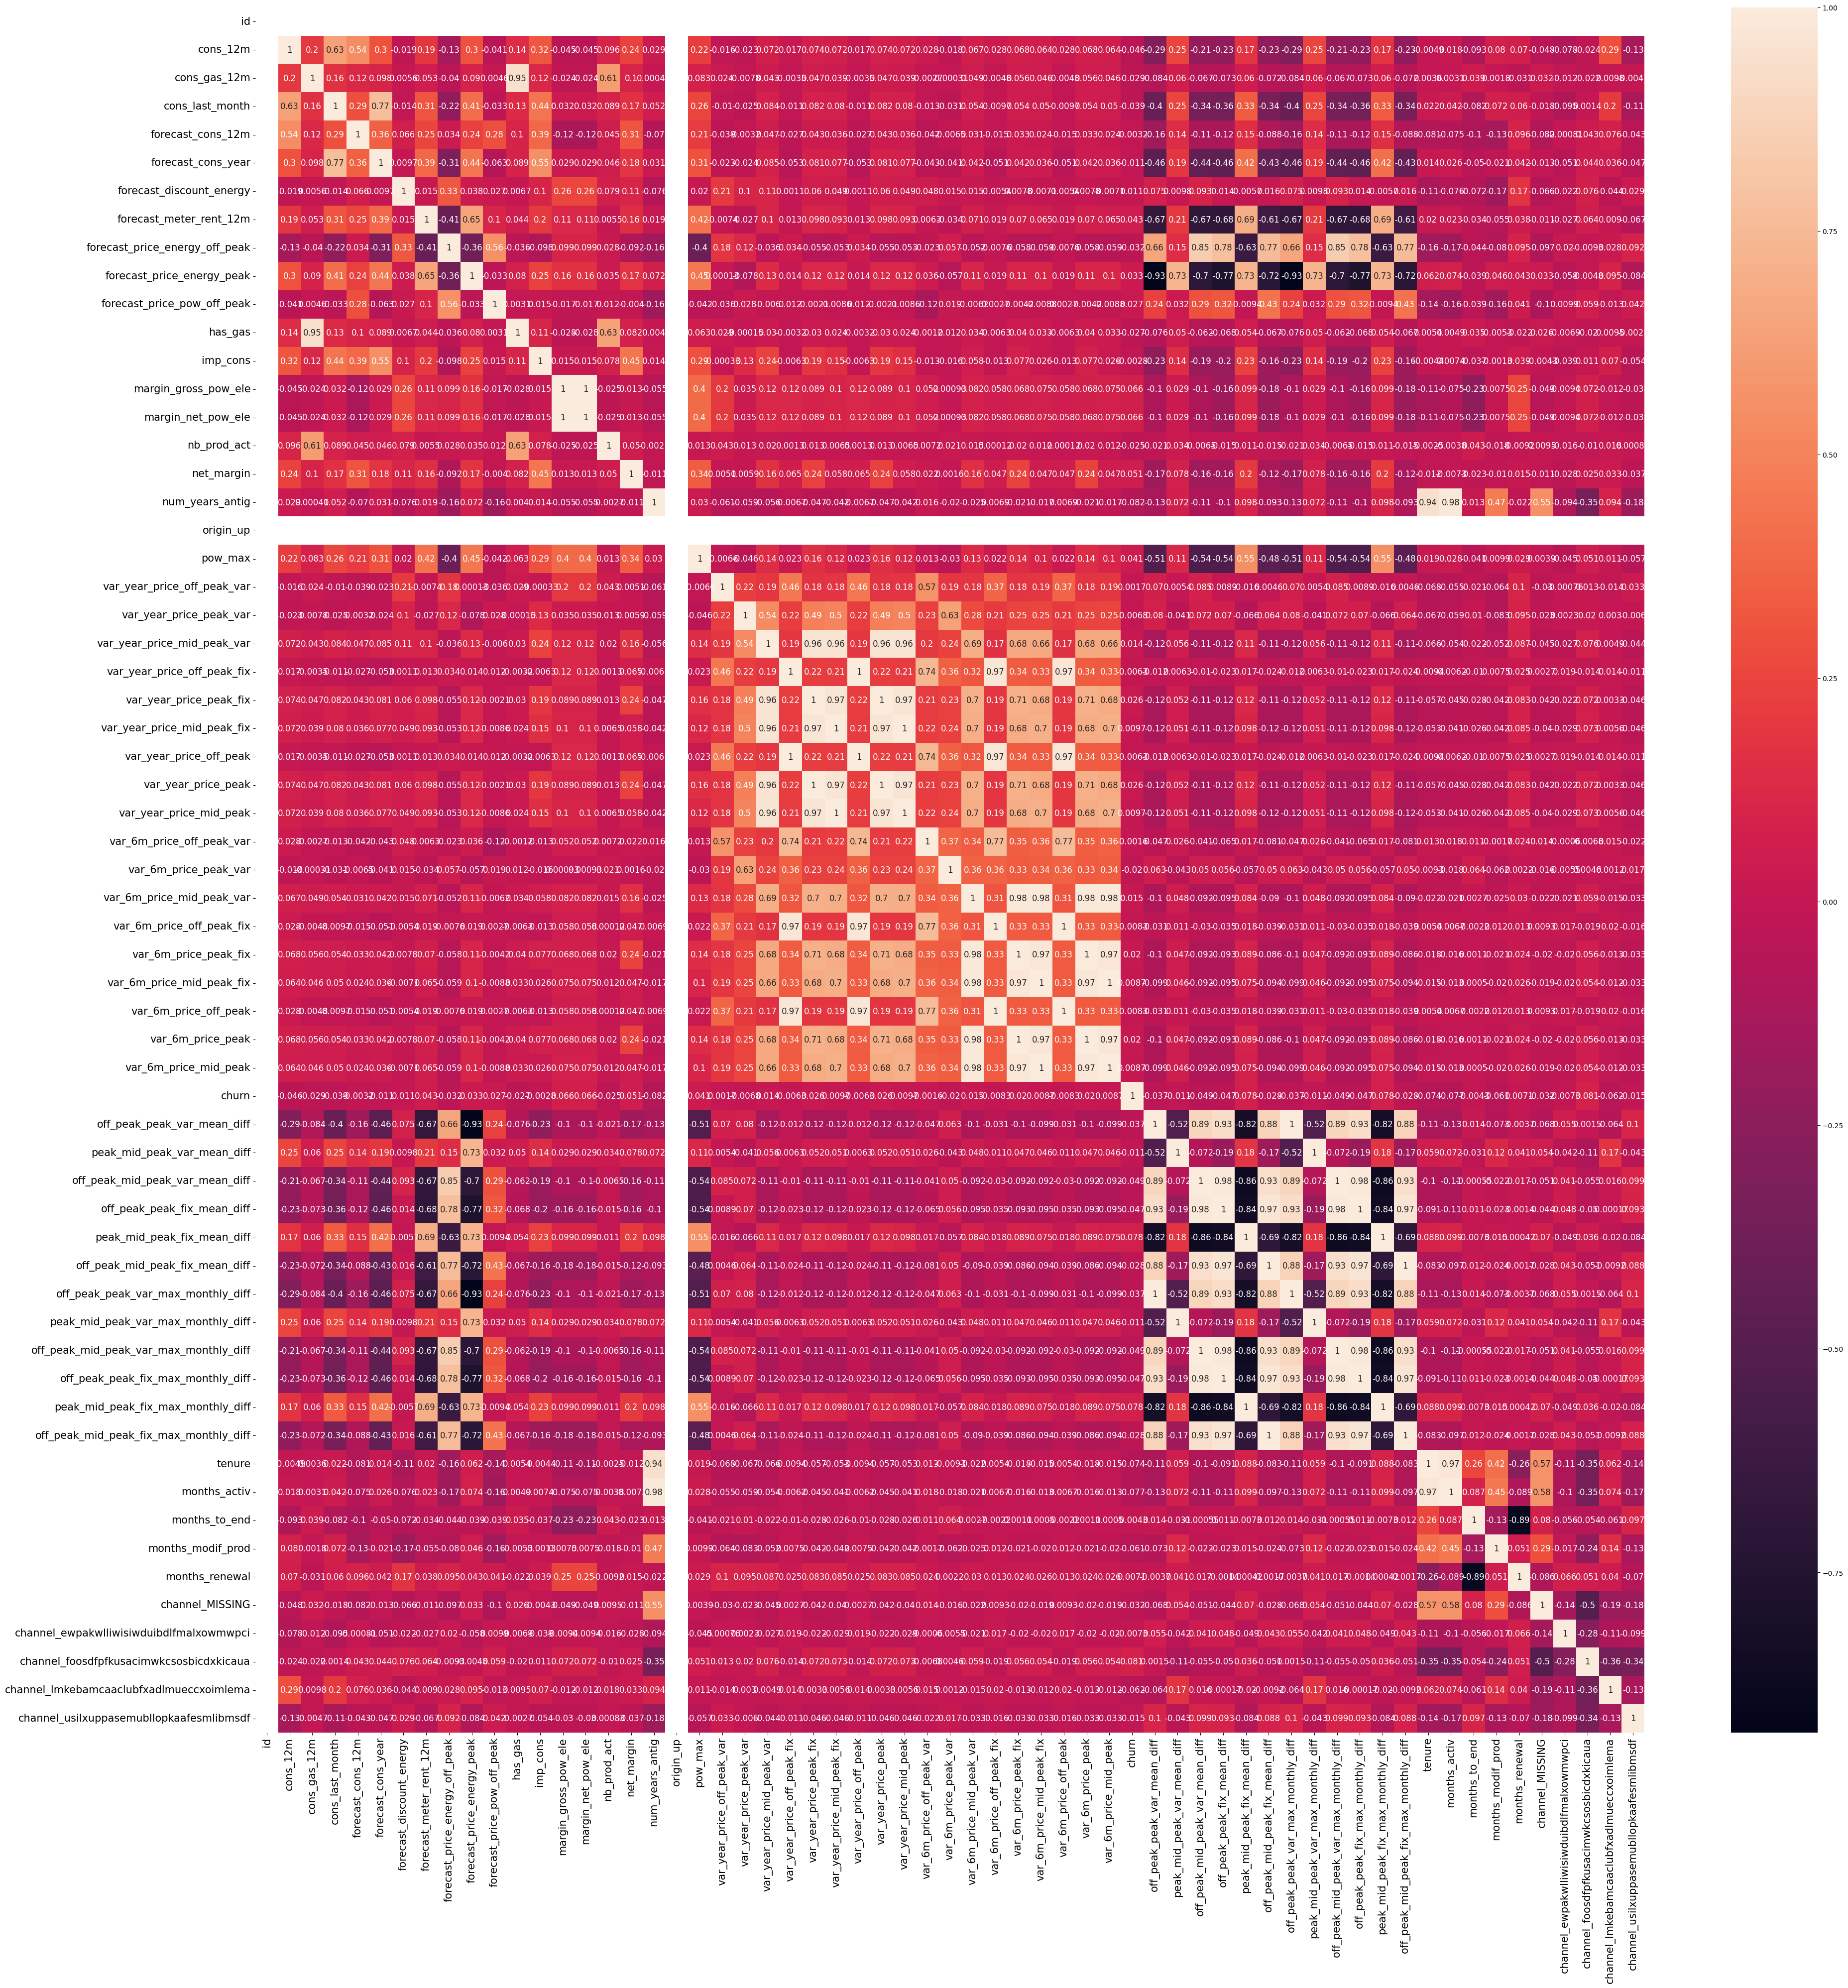

In [ ]:
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

now at the end i will remove the column which the most less related to churn and apply all the above steps again to give more accurate results
